In [1]:
import copy
from keypress_recognition.models import keyboard_model
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt

# of K_train: 90089
# of K_test: 3820
# of K_val: 4949


In [2]:
black_indices = np.array([1, 4, 6, 9, 11, 13, 16, 18, 21, 23, 25, 28, 30, 33, 35, 37, 40, 42, 45, 47, 49, 52, 54, 57, 59, 61, 64, 66, 69, 71, 73, 76, 78, 81, 83, 85])
def visualize_keys(notes):
    """
    notes: size (88,)
    """
    key_color = np.zeros(88, dtype=bool)
    key_color[black_indices] = True
    print(key_color.shape, notes.shape)
    for i in key_color:
        print("🌚" if i else "🏐", end="")
    print()
    for i in notes:
        print("🔶" if i else "🔷", end="")
    print()
visualize_keys(np.array([0,1,0,1] + [0]*84))

(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔶🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


Samples from X_train: 
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


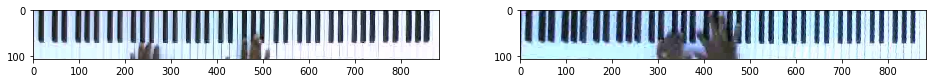

Samples from X_test: 
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


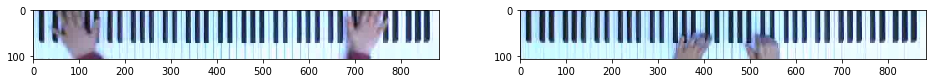

Samples from X_val: 
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


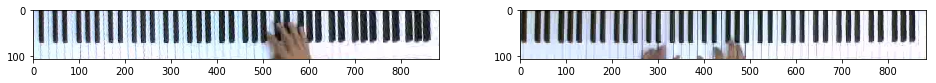

In [3]:
# print several keyboard images with labels

for _type in ['train', 'test', 'val']:

    print(f'Samples from X_{_type}: ')

    fig, axarr = plt.subplots(1, 2, figsize=[16, 16])

    for i in range(0, 2):
        img, notes = dataset.get_sample(_type, method=2)
        axarr[i].imshow(img)
        visualize_keys(notes)

    plt.show()

In [ ]:
keyboard_model.train(dataset, batch_size=32, num_epochs=20,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_keyboard_model.tar',
                     current_path='keypress_recognition/current_keyboard.tar')

Accuracy Matrix: both_0, pred_0_but_out_1, pred_1_but_out_0, both_1
Epoch 1/20


IntProgress(value=0, max=90089)

In [ ]:
X, _ = dataset.get_sample('train', method=2)
plt.imshow(X)
plt.show()
X = np.transpose(X, [2, 0, 1])[None]
y = keyboard_model.evaluate(X)[0]
visualize_keys(y)